In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

قراءة البيانات

In [2]:
df=pd.read_csv('../EcooVision/Newsynthetic_family_data_expanded.csv')

قراءة البيانات في DataFrame

In [3]:
df.head(10)

,PersonID,Event,Timestamp,Weather,Temp,Wind,Humidity,NumDailyExits,Date,Hour,Minute
0,amal,Exit,2017-01-01 14:09:27.004912,Clear,17,6,64.0,1.0,2017-01-01,14,9
1,sadeem,Exit,2017-01-01 15:36:50.848608,Clear,17,6,64.0,1.0,2017-01-01,15,36
2,amal,Enter,2017-01-01 16:08:15.097898,Clear,17,6,64.0,1.0,2017-01-01,16,8
3,sadeem,Enter,2017-01-01 18:44:29.338654,Clear,17,6,64.0,1.0,2017-01-01,18,44
4,sadeem,Exit,2017-01-02 06:28:54.776145,Clear,18,7,56.0,1.0,2017-01-02,6,28
5,abdulmalik,Exit,2017-01-02 07:17:59.696180,Clear,18,7,56.0,1.0,2017-01-02,7,17
6,aseel,Exit,2017-01-02 07:25:24.758530,Clear,18,7,56.0,1.0,2017-01-02,7,25
7,amal,Exit,2017-01-02 07:26:42.408726,Clear,18,7,56.0,3.0,2017-01-02,7,26
8,obaid,Exit,2017-01-02 07:51:03.217736,Clear,18,7,56.0,2.0,2017-01-02,7,51
9,amal,Enter,2017-01-02 11:37:52.330252,Clear,18,7,56.0,3.0,2017-01-02,11,37


وصف إحصائي للأعمدة الرقمية:

In [4]:
print(df.describe())

              Temp         Wind     Humidity  NumDailyExits         Hour  \
count  9850.000000  9850.000000  9850.000000    9848.000000  9850.000000   
mean     25.937259    12.635939    41.116954       1.716186    12.764670   
std       9.711919     7.345584    23.654984       0.667526     4.307013   
min       0.000000     0.000000    10.000000       1.000000     0.000000   
25%      18.000000     7.000000    22.000000       1.000000     8.000000   
50%      26.000000    11.000000    34.000000       2.000000    13.000000   
75%      34.000000    17.000000    55.000000       2.000000    16.000000   
max      47.000000    48.000000   100.000000       4.000000    23.000000   

            Minute  
count  9850.000000  
mean     29.286904  
std      17.224171  
min       0.000000  
25%      15.000000  
50%      29.000000  
75%      44.000000  
max      59.000000  


رؤية الأعمدة المتاحة وأنواعها:

In [5]:
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PersonID       9850 non-null   object 
 1   Event          9850 non-null   object 
 2   Timestamp      9850 non-null   object 
 3   Weather        9850 non-null   object 
 4   Temp           9850 non-null   int64  
 5   Wind           9850 non-null   int64  
 6   Humidity       9850 non-null   float64
 7   NumDailyExits  9848 non-null   float64
 8   Date           9850 non-null   object 
 9   Hour           9850 non-null   int64  
 10  Minute         9850 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 846.6+ KB
None
Index(['PersonID', 'Event', 'Timestamp', 'Weather', 'Temp', 'Wind', 'Humidity',
       'NumDailyExits', 'Date', 'Hour', 'Minute'],
      dtype='object')


القيم المفقودة:

In [6]:
df.isna().sum()

PersonID         0
Event            0
Timestamp        0
Weather          0
Temp             0
Wind             0
Humidity         0
NumDailyExits    2
Date             0
Hour             0
Minute           0
dtype: int64

القيم الشاذة (Outliers):

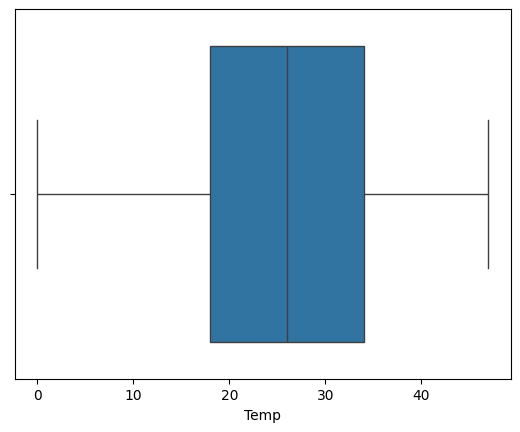

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Temp'])
plt.show()

استكشاف العلاقات بين المتغيرات

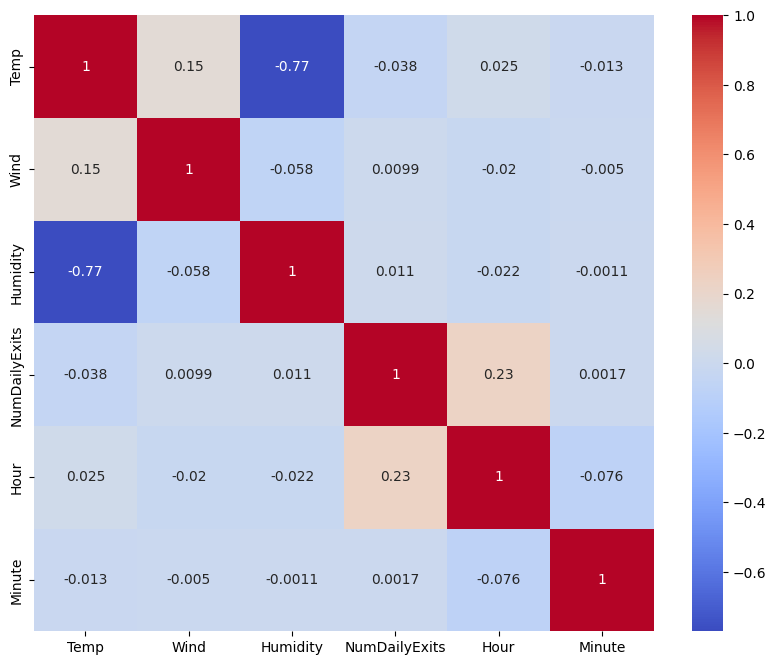

In [8]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#clustermap or heatmap
plt.show()


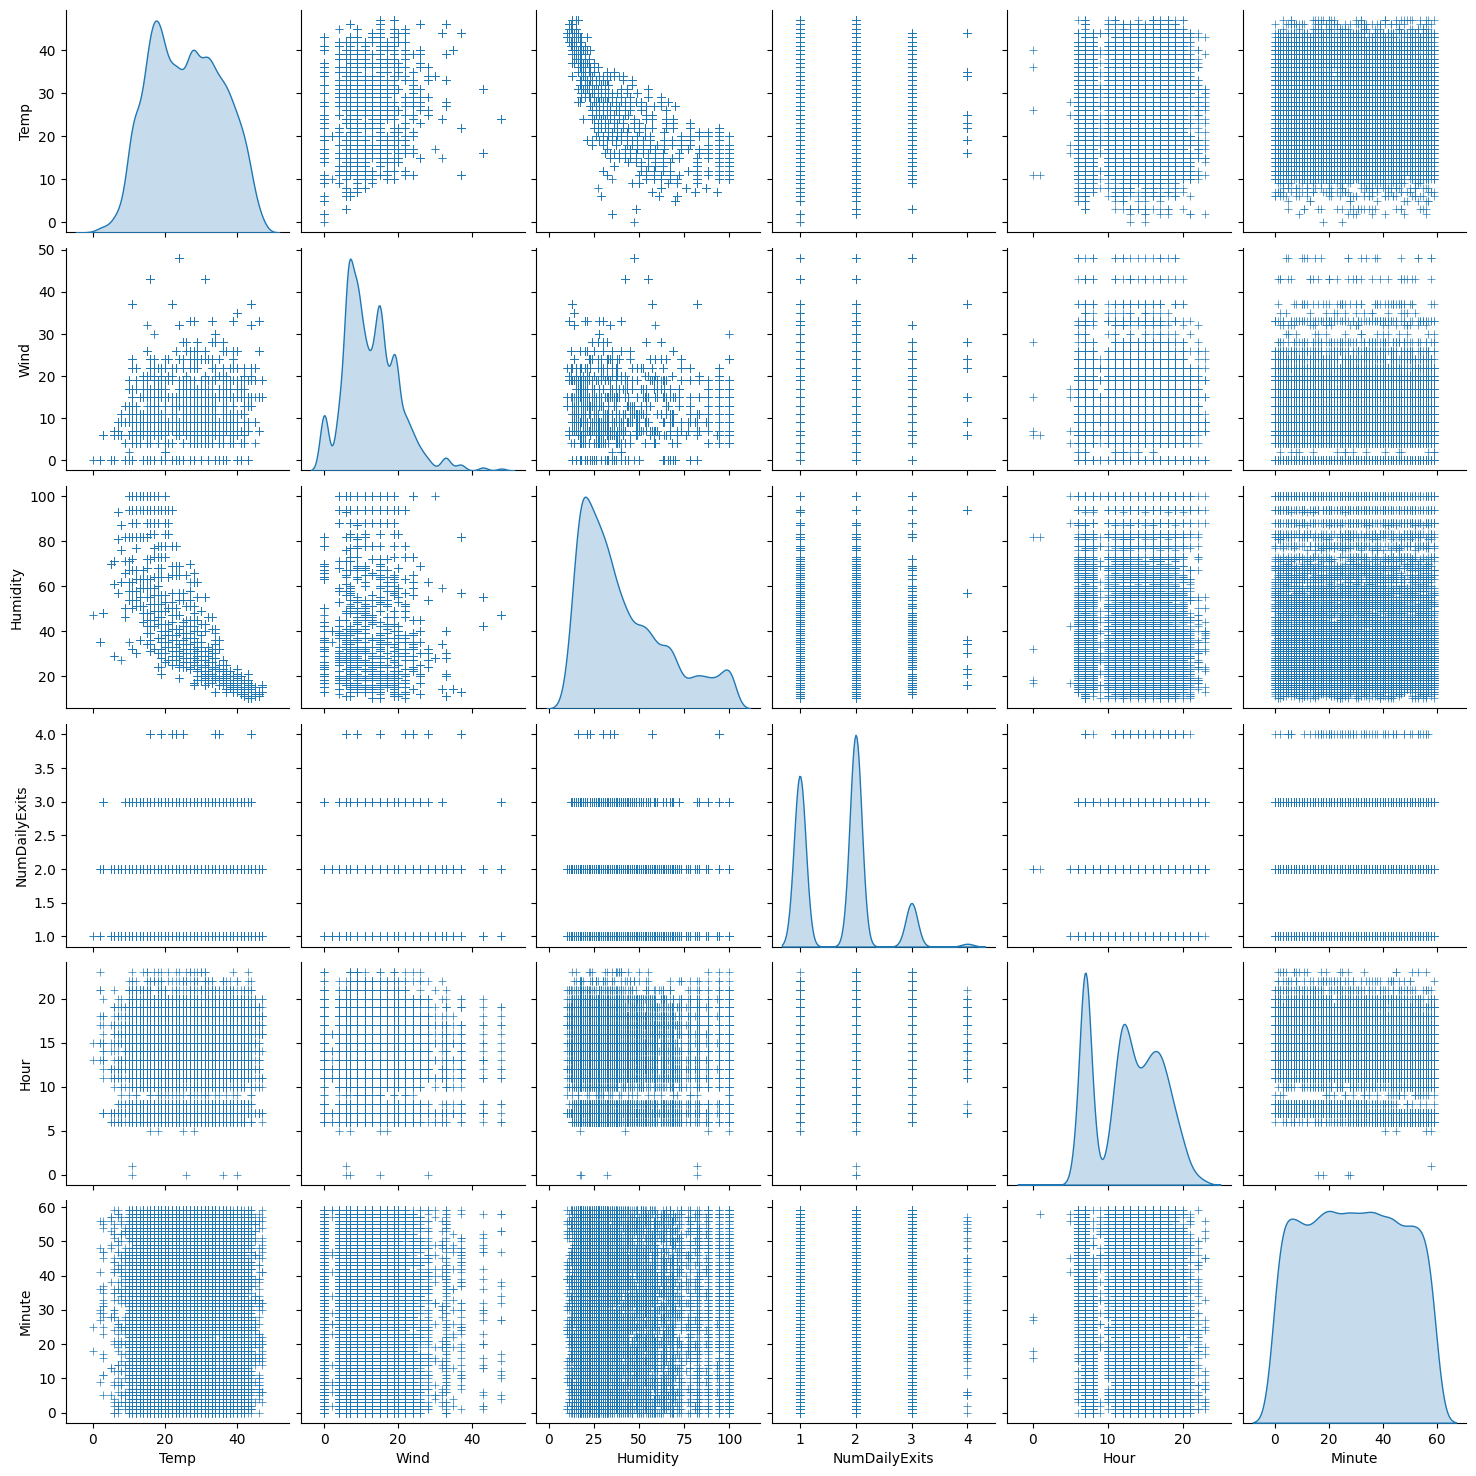

In [9]:
#Let's take a look at all the features with # pair plot.
sns.pairplot(df, diag_kind = "kde", markers = "+")
plt.show()

العلاقة بين الطقس (Temp, Humidity, Wind) وعدد الخروج:

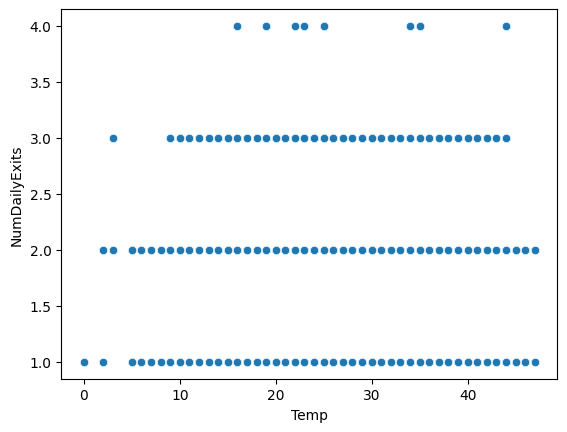

In [10]:
sns.scatterplot(data=df, x='Temp', y='NumDailyExits')
plt.show()

استخراج الإحصاءات الهامة

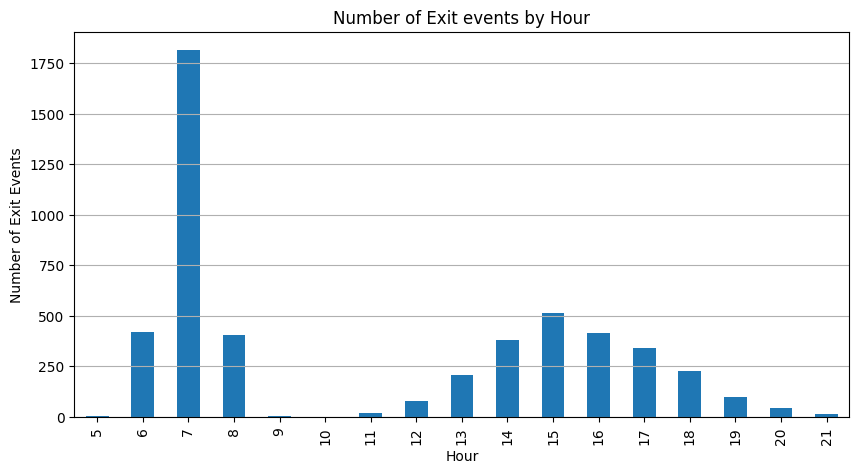

In [55]:

# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')  # Convert, handling invalid data

# Check for any NaT (Not a Time) values after conversion
if df['Timestamp'].isnull().any():
    print("Warning: There are invalid Timestamp entries that could not be converted.")

# Extract hour from Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Group by Hour for Exit events and calculate the count
avg_exit_by_hour = df[df['Event'] == 'Exit'].groupby('Hour').size()

# Plot the results
avg_exit_by_hour.plot(kind='bar', figsize=(10, 5))
plt.title("Number of Exit events by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Exit Events")
plt.grid(axis='y')
plt.show()


إضافة ميزات (Feature Engineering) 

In [90]:
df['DayOfWeek'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.weekday

إذا احتجنا لاستخراج الساعة من Timestamp أيضًا (للتنبؤ أو التحليل):

In [57]:
df['Hour'] = pd.to_datetime(df['Timestamp'], errors='coerce').dt.hour

تصنيف الفترة الزمنية (صباح – ظهر – مساء…)

In [58]:
def time_of_day(h):
    if 5 <= h < 12:
        return 'morning'
    elif 12 <= h < 17:
        return 'afternoon'
    elif 17 <= h < 21:
        return 'evening'
    else:
        return 'night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)


 تصنيف الطقس (Weather)

In [59]:

df_unique_weather = df[['Weather']].drop_duplicates().reset_index(drop=True)
print(df_unique_weather)


                           Weather
0                           Sunny 
1                           Clear 
2                Scattered clouds 
3                  Passing clouds 
4                    Partly sunny 
5                  Low level haze 
6                             Fog 
7            Rain  Passing clouds 
8   Thunderstorms  Passing clouds 
9                        Overcast 
10                           Mild 
11                      Duststorm 
12           Light rain  Overcast 
13                 Rain  Overcast 
14             Rain  Partly sunny 
15       Light rain  Partly sunny 
16                  Broken clouds 


In [60]:
def categorize_weather(w_str):
    if w_str is None:
        return 'Unknown'
    
    # إزالة الفراغات في البداية والنهاية
    w_lower = w_str.lower().strip()
    
    # وضع سلاسل فحص مرتبة من الأكثر خصوصية إلى الأكثر عمومية
    if 'thunder' in w_lower:
        return 'Storm'
    elif 'rain' in w_lower:
        return 'Rain'
    elif 'dust' in w_lower:
        return 'Dust'
    elif 'fog' in w_lower:
        return 'Fog'
    elif 'haze' in w_lower:
        return 'Haze'
    elif 'cloud' in w_lower:
        return 'Cloudy'
    # لاحظ أن بعض القيم بها 'partly sunny' أو 'sunny'
    elif 'sunny' in w_lower or 'clear' in w_lower:
        return 'Clear'
    else:
        # أي حالة لم تدخل ضمن ما سبق
        return 'Other'
df['WeatherCat'] = df['Weather'].apply(categorize_weather)


التخلص من الأعمدة غير المفيدة:

In [61]:
df.drop(columns=['city'], inplace=True, errors='ignore')

#حفظ البيانات بعد إضافة الأعمدة

In [95]:
print(y_train.isnull().sum())  # Number of missing values

0


In [96]:
df.to_csv("with_dayofweek1.csv", index=False)

تجهيز مجموعة البيانات للموديل

In [98]:
df=pd.read_csv('with_dayofweek1.csv')

In [99]:
# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Add DayOfWeek column
df['DayOfWeek'] = df['Timestamp'].dt.weekday  # 0=Monday, 6=Sunday


اشتقاق DayOfWeek من Date بدلا من Timestamp

In [100]:
# Ensure Date is in datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract DayOfWeek from Date
df['DayOfWeek'] = df['Date'].dt.weekday  # 0=Monday, 6=Sunday


In [101]:
import pandas as pd

# تحميل البيانات
file_path = "with_dayofweek1.csv"  # ضع مسار الملف هنا
data = pd.read_csv(file_path)

# التأكد من صحة الحقول 'Date'، 'Hour'، و'Minute'
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # تأكد من صحة التاريخ
data['Hour'] = pd.to_numeric(data['Hour'], errors='coerce')  # تأكد من أن الساعات أرقام صحيحة
data['Minute'] = pd.to_numeric(data['Minute'], errors='coerce')  # تأكد من أن الدقائق أرقام صحيحة

# إزالة الصفوف غير الصالحة
cleaned_data = data.dropna(subset=['Date', 'Hour', 'Minute'])

# ترتيب البيانات حسب الشخص والتاريخ
cleaned_data = cleaned_data.sort_values(by=['PersonID', 'Date', 'Hour', 'Minute']).reset_index(drop=True)

# إزالة الأحداث المتكررة أو غير المتسلسلة
final_cleaned_data = []
for person_id in cleaned_data['PersonID'].unique():
    person_data = cleaned_data[cleaned_data['PersonID'] == person_id].copy()
    last_event = None
    
    for _, row in person_data.iterrows():
        if last_event == 'Exit' and row['Event'] == 'Exit':
            continue  # تجاهل الخروج المكرر
        elif last_event == 'Enter' and row['Event'] == 'Enter':
            continue  # تجاهل الدخول المكرر
        else:
            final_cleaned_data.append(row)
            last_event = row['Event']

final_cleaned_data = pd.DataFrame(final_cleaned_data)

# إعادة حساب الفارق الزمني (TimeToNextExit) للأحداث المتسلسلة
final_cleaned_data['NextEventTime'] = final_cleaned_data.groupby('PersonID')['Date'].shift(-1) + \
                                      pd.to_timedelta(final_cleaned_data.groupby('PersonID')['Hour'].shift(-1), unit='h') + \
                                      pd.to_timedelta(final_cleaned_data.groupby('PersonID')['Minute'].shift(-1), unit='m')

final_cleaned_data['CurrentEventTime'] = final_cleaned_data['Date'] + \
                                         pd.to_timedelta(final_cleaned_data['Hour'], unit='h') + \
                                         pd.to_timedelta(final_cleaned_data['Minute'], unit='m')

final_cleaned_data['TimeToNextExit'] = (
    (final_cleaned_data['NextEventTime'] - final_cleaned_data['CurrentEventTime']).dt.total_seconds() / 3600
)

# إزالة الأعمدة الوسيطة
final_cleaned_data.drop(columns=['NextEventTime', 'CurrentEventTime'], inplace=True)

# حفظ البيانات النظيفة في ملف جديد
output_file_path = "Cleaned1_synthetic_family_data.csv"  # ضع مسار الملف الجديد هنا
final_cleaned_data.to_csv(output_file_path, index=False)

print(f"تم حفظ البيانات النظيفة في الملف: {output_file_path}")


تم حفظ البيانات النظيفة في الملف: Cleaned1_synthetic_family_data.csv


عدد السجلات التي تزيد عن 48 ساعة

In [67]:
import pandas as pd

# تحميل الملف
file_path = "Cleaned1_synthetic_family_data.csv"  # استبدل بمسار الملف لديك
data = pd.read_csv(file_path)

# فرز السجلات التي تزيد مدتها عن 48 ساعة
long_stay_records = data[data['TimeToNextExit'] > 48]

# عدد السجلات
long_stay_count = len(long_stay_records)

# أسماء الأشخاص الفريدين
persons_with_long_stays = long_stay_records['PersonID'].unique()

# عرض النتائج
print(f"Number of records exceeding 48 hours: {long_stay_count}")
print("Persons with long stays:", persons_with_long_stays)


Number of records exceeding 48 hours: 283
Persons with long stays: ['abdulmalik' 'amal' 'aseel' 'obaid' 'sadeem']


حذف السجلات التي تزيد مدتها عن 48 ساعة

In [68]:
import pandas as pd

# تحميل الملف
file_path = "Cleaned1_synthetic_family_data.csv"  # استبدل بمسار الملف لديك
data = pd.read_csv(file_path)

# فرز السجلات التي تزيد مدتها عن 48 ساعة
long_stay_records = data[data['TimeToNextExit'] > 48]

# حذف السجلات التي تزيد مدتها عن 48 ساعة من البيانات الأصلية
data = data[data['TimeToNextExit'] <= 48]

# حفظ الملف الناتج
output_file_path = "Cleaned_synthetic_family_data_less_than_48.csv"  # استبدل بمسار الملف الجديد
data.to_csv(output_file_path, index=False)

# عدد السجلات التي تم حذفها
long_stay_count = len(long_stay_records)

# أسماء الأشخاص الفريدين
persons_with_long_stays = long_stay_records['PersonID'].unique()

# عرض النتائج
print(f"Number of records exceeding 48 hours: {long_stay_count}")
print("Persons with long stays:", persons_with_long_stays)
print(f"Cleaned data saved to {output_file_path}")


Number of records exceeding 48 hours: 283
Persons with long stays: ['abdulmalik' 'amal' 'aseel' 'obaid' 'sadeem']
Cleaned data saved to Cleaned_synthetic_family_data_less_than_48.csv


In [69]:
df=pd.read_csv('Cleaned_synthetic_family_data_less_than_48.csv')

TimeToNextExit

In [70]:
import pandas as pd
from datetime import timedelta

# تأكد من أن العمود Timestamp هو datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# ترتيب البيانات
df = df.sort_values(by=['PersonID', 'Timestamp']).reset_index(drop=True)

rows = []
for person_id in df['PersonID'].unique():
    person_df = df[df['PersonID'] == person_id].copy()
    person_df = person_df.sort_values(by='Timestamp')

    for i in range(len(person_df) - 1):
        current_event = person_df.iloc[i]
        next_event = person_df.iloc[i + 1]
        
        # فقط إذا current_event هو Enter ونوع الحدث القادم Exit
        if current_event['Event'] == 'Enter' and next_event['Event'] == 'Exit':
            time_diff = (next_event['Timestamp'] - current_event['Timestamp']).total_seconds() / 3600.0  # بالساعات
            # ابني الميزات
            day_of_week = current_event['DayOfWeek']
            hour = current_event['Hour']
            temp = current_event['Temp']
            wind = current_event['Wind']
            humidity = current_event['Humidity']
            # ...

            # أضف الصف
            rows.append({
                'PersonID': person_id,
                'DayOfWeek': day_of_week,
                'Hour': hour,
                'Temp': temp,
                'Wind': wind,
                'Humidity': humidity,
                # ...
                'TimeToNextExit': time_diff  # هذا y
            })

df_model = pd.DataFrame(rows)
print(df_model.head(10))


     PersonID  DayOfWeek  Hour  Temp  Wind  Humidity  TimeToNextExit
0  abdulmalik          6    17    14     9      72.0       16.038390
1  abdulmalik          0    14    13    13      77.0        0.109258
2  abdulmalik          0    16    13    13      77.0        0.713723
3  abdulmalik          0    19    13    13      77.0       12.216325
4  abdulmalik          1    11    12    13      58.0       19.298719
5  abdulmalik          2    11    13    20      51.0        3.447231
6  abdulmalik          2    17    13    20      51.0       13.532081
7  abdulmalik          3    12    12    22      54.0       18.956708
8  abdulmalik          4    11     8     0      62.0        6.050546
9  abdulmalik          4    19     8     0      62.0       20.324699


صيغة Timestamp:

In [71]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


فصل الميزات عن الهدف (X, y)

In [72]:
X = df_model.drop(columns=['TimeToNextExit', 'PersonID'], errors='ignore')
y = df_model['TimeToNextExit']


 تقسيم Train/Test

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=42)


        # Enter ونوع الحدث القادم Exit


In [80]:
import pandas as pd
from datetime import timedelta

df = df.sort_values(by=['PersonID', 'Timestamp']).reset_index(drop=True)

rows = []
for person_id in df['PersonID'].unique():
    person_df = df[df['PersonID'] == person_id].copy()
    person_df = person_df.sort_values(by='Timestamp')

    for i in range(len(person_df) - 1):
        current_event = person_df.iloc[i]
        next_event = person_df.iloc[i + 1]
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        # فقط إذا current_event هو Enter ونوع الحدث القادم Exit
        if current_event['Event'] == 'Enter' and next_event['Event'] == 'Exit':
            time_diff = (next_event['Timestamp'] - current_event['Timestamp']).total_seconds() / 3600.0  # بالساعات
            # ابني الميزات
            day_of_week = current_event['DayOfWeek']
            hour = current_event['Hour']
            # بيانات الطقس
            temp = current_event['Temp']
            wind = current_event['Wind']
            humidity = current_event['Humidity']
            # الخ... (ميزات إضافية مثل WeatherCat)

            # أضف الصف
            rows.append({
                'PersonID': person_id,
                'DayOfWeek': day_of_week,
                'Hour': hour,
                'Temp': temp,
                'Wind': wind,
                'Humidity': humidity,
                # ...
                'TimeToNextExit': time_diff  # هذا y
            })

df_model = pd.DataFrame(rows)
print(df_model.head(10))


     PersonID  DayOfWeek  Hour  Temp  Wind  Humidity  TimeToNextExit
0  abdulmalik          6    17    14     9      72.0       16.038390
1  abdulmalik          0    14    13    13      77.0        0.109258
2  abdulmalik          0    16    13    13      77.0        0.713723
3  abdulmalik          0    19    13    13      77.0       12.216325
4  abdulmalik          1    11    12    13      58.0       19.298719
5  abdulmalik          2    11    13    20      51.0        3.447231
6  abdulmalik          2    17    13    20      51.0       13.532081
7  abdulmalik          3    12    12    22      54.0       18.956708
8  abdulmalik          4    11     8     0      62.0        6.050546
9  abdulmalik          4    19     8     0      62.0       20.324699


In [78]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

correlation_matrix.style.background_gradient(cmap='coolwarm') \
                   .set_properties(**{'font-family': 'Segoe UI'})


,Temp,Wind,Humidity,NumDailyExits,Hour,Minute,DayOfWeek,TimeToNextExit
Temp,1.000000,0.222554,-0.765379,-0.009018,0.022766,0.009536,-0.007868,0.012175
Wind,0.222554,1.000000,-0.109237,-0.054732,-0.017804,0.033939,0.012688,0.019905
Humidity,-0.765379,-0.109237,1.000000,0.002954,-0.028952,-0.010057,-0.004336,-0.003652
NumDailyExits,-0.009018,-0.054732,0.002954,1.000000,0.220558,-0.011759,-0.181454,-0.347152
Hour,0.022766,-0.017804,-0.028952,0.220558,1.000000,-0.063298,0.218058,0.220593
Minute,0.009536,0.033939,-0.010057,-0.011759,-0.063298,1.000000,-0.009491,0.012886
DayOfWeek,-0.007868,0.012688,-0.004336,-0.181454,0.218058,-0.009491,1.000000,0.076933
TimeToNextExit,0.012175,0.019905,-0.003652,-0.347152,0.220593,0.012886,0.076933,1.000000


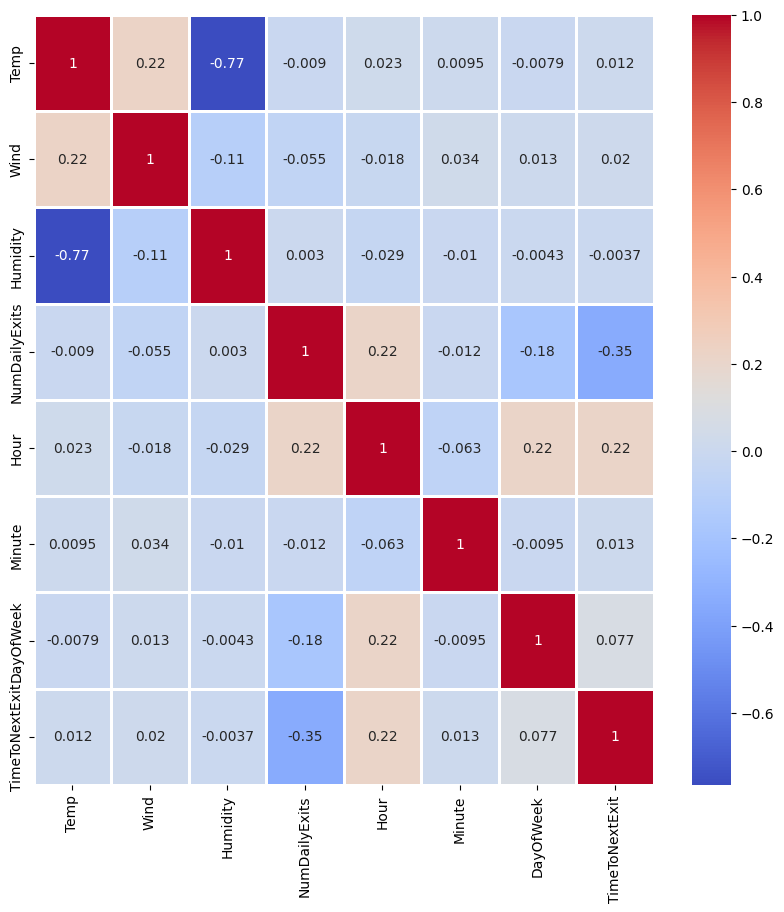

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# اختر الأعمدة من نوع float أو int
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), linewidths=1, cmap='coolwarm', annot=True)
plt.show()
